In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")


In [2]:
# loading datasets

# calls_url = 'https://code.s3.yandex.net/datasets/megaline_calls.csv'
# internet_url = 'https://code.s3.yandex.net/datasets/megaline_internet.csv'
# messages_url = 'https://code.s3.yandex.net/datasets/megaline_messages.csv'
# plans_url = 'https://code.s3.yandex.net/datasets/megaline_plans.csv'
# users1_url = 'https://code.s3.yandex.net/datasets/megaline_users1.csv'

# calls_df = pd.read_csv(calls_url, parse_dates=['call_date'])
# internet_df = pd.read_csv(internet_url, parse_dates=['session_date'])
# messages_df = pd.read_csv(messages_url, parse_dates=['message_date'])
# plans_df = pd.read_csv(plans_url)
# users1_df = pd.read_csv(users1_url, parse_dates=['reg_date', 'churn_date'])

# let's convert the date of mssg/call/inet/reg/churn to 'datetime64'

calls_df = pd.read_csv('megaline_calls.csv', parse_dates=['call_date'])
internet_df = pd.read_csv('megaline_internet.csv', parse_dates=['session_date'])
messages_df = pd.read_csv('megaline_messages.csv', parse_dates=['message_date'])
plans_df = pd.read_csv('megaline_plans.csv')
users1_df = pd.read_csv('megaline_users1.csv', parse_dates=['reg_date', 'churn_date'])


In [3]:
# look ahead and print the datasets heads
# and tails at the end

print('megaline_calls.csv')
print(calls_df.head(3))
print(calls_df.tail(3), end='\n\n')
print('megaline_internet.csv')
print(internet_df.head(3))
print(internet_df.tail(3), end='\n\n')
print('megaline_messages.csv')
print(messages_df.head(3))
print(messages_df.tail(3), end='\n\n')
print('megaline_users1.csv')
print(users1_df.head(3))
print(users1_df.tail(3), end='\n\n')
print('megaline_plans.csv')
print(plans_df.head(2), end='\n\n')

megaline_calls.csv
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
              id  user_id  call_date  duration
137732  1499_201     1499 2018-09-21      8.12
137733  1499_202     1499 2018-10-10      0.37
137734  1499_203     1499 2018-12-29     13.86

megaline_internet.csv
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
              id  user_id session_date  mb_used
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

megaline_messages.csv
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
             id  user_id message_date
76048  1497_547     1497   2018-12-31
760

Seems like `reg_date ` dosn&#39;t match with the description bellow
- **in the description** (dd, mm, yy)
- **in the dataset** (yyyy-mm-dd)

But it&#39;s not a big deal, right)
We may change the description, shall we?

# Description of the data

The `users` table (data on users):

- *user_id* — unique user identifier
- *first_name* — user's name
- *last_name* — user's last name
- *age* — user's age (years)
- *reg_date* — subscription date (dd, mm, yy) **it's actually (yyyy-mm-dd)**
- *churn_date* — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was generated) **so here we have some missunderstanding as well**
- *city* — user's city of residence
- *plan* — calling plan name

The `calls` table (data on calls):

- *id* — unique call identifier
- *call_date* — call date
- *duration* — call duration (in minutes)
- *user_id* — the identifier of the user making the call

The `messages` table (data on texts):

- *id* — unique text message identifier
- *message_date* — text message date
- *user_id* — the identifier of the user sending the text

The `internet` table (data on web sessions):

- *id* — unique session identifier
- *mb_used* — the volume of data spent during the session (in megabytes)
- *session_date* — web session date
- *user_id* — user identifier

The `plans` table (data on the plans):

- *plan_name* — calling plan name
- *usd_monthly_fee* — monthly charge in US dollars
- *minutes_included* — monthly minute allowance
- *messages_included* — monthly text allowance
- *mb_per_month_included* — data volume allowance (in megabytes)
- *usd_per_minute* — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- *usd_per_message* — price per text after exceeding the package limits
- *usd_per_gb* — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

In [24]:
# Finding errors in the datasets

# Date in the data should be date)
print('megaline_calls datatypes:')
print(calls_df.dtypes, end='\n\n')

print('megaline_internet datatypes:')
print(internet_df.dtypes, end='\n\n')

print('megaline_messages datatypes:')
print(messages_df.dtypes, end='\n\n')

print('megaline_plans datatypes:')
print(plans_df.dtypes, end='\n\n')

print('megaline_users1 datatypes:')
print(users1_df.dtypes, end='\n\n')

print('megaline_calls na:')
print(calls_df.isna().sum(), end='\n\n')
print('megaline_calls max and min duration:')
print(calls_df.duration.max())
print(calls_df.duration.min(), end='\n\n')
zero_duration = calls_df[calls_df.duration == 0.0]
print(zero_duration.shape)
print(calls_df.shape)
# Jeez, too many calls with zero duration..

# checking for NAN items
print('megaline_internet na:')
print(internet_df.isna().sum(), end='\n\n')
print('megaline_messages na:')
print(messages_df.isna().sum(), end='\n\n')
print('megaline_plans na:')
print(plans_df.isna().sum(), end='\n\n')

# Since we trust the description, in the next step we'll find some NA items.
# Hope we'll find a lot and only in churn_date,
# so most of our customers still our customers)
print('megaline_users1 na:')
print(users1_df.isna().sum(), end='\n\n')

# in case we have curious ages
print('megaline_users1 max and min age:')
print(users1_df.age.max())
print(users1_df.age.min(), end='\n\n')

print('the names of the planes')
print(users1_df.plan.unique(), end='\n\n')

print('the unique cities')
user_cities = []
for city in users1_df.city:
    user_cities.append(city.split(', ')[1].strip())
user_cities = pd.DataFrame(data={'user_id': users1_df.user_id, 'reg_code':user_cities})
print(user_cities, end='\n\n')

print('megaline_users1 duplicated in user_id:')
print(users1_df.user_id.duplicated().sum())

print(users1_df.user_id.min())
print(users1_df.user_id.max())
print(users1_df.shape)


megaline_calls datatypes:
id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

megaline_internet datatypes:
id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

megaline_messages datatypes:
id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

megaline_plans datatypes:
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

megaline_users1 datatypes:
user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_d

### We have some issues with the codes of region
it contains spaces, or somekind of nonprinting simbols

In [5]:
# since the id mssg/call/inet is string
# function to check the id mssg/call/inet is correct


def is_id_correct (df_to_check):
    no_number_items = df_to_check[~df_to_check.id.str.contains('[0-9_]')]
    return no_number_items.empty



In [6]:
print('megaline_calls id is correct', end=': ')
print(is_id_correct(calls_df))
print('megaline_internet id is correct', end=': ')
print(is_id_correct(internet_df))
print('megaline_messages id is correct', end=': ')
print(is_id_correct(messages_df))


megaline_calls id is correct: True
megaline_internet id is correct: True
megaline_messages id is correct: True


## Function cecking that user actually stopped using the service

just to be shure

In [7]:
def activity_after_unsubscr (unsubscr_users):
    stop_after_unsubscr = 0
    use_after_unsubscr = 0
    for user_id in unsubscr_users.user_id:
        unsubscription_date = users1_df[users1_df['user_id'] == user_id].churn_date.item()
        user_calls_date = calls_df[(calls_df['user_id'] == user_id) & (calls_df['duration'] > 0.0)].call_date
        max_call_date = user_calls_date.max()
        user_message_date = messages_df[messages_df['user_id'] == user_id].message_date
        max_message_date = user_message_date.max()
        user_internet_date = internet_df[(internet_df['user_id'] == user_id) & (internet_df['mb_used'] > 0.0)].session_date
        max_internet_date = user_internet_date.max()
        
        if max_call_date > unsubscription_date:
            calls_unsubscr = calls_df[(calls_df['user_id'] == user_id) &
                                      (calls_df['call_date'] > unsubscription_date) &
                                      (calls_df['duration'] > 0.0)]
            max_unsubscr_call_date = calls_unsubscr.call_date.max()
            min_unsubscr_call_date = calls_unsubscr.call_date.min()
#             print(f'user id {user_id} had {len(calls_unsubscr)} calls' ,end=' ')
#             print(f'from {min_unsubscr_call_date.date()} to {max_unsubscr_call_date.date()}', end=' ')
#             print(f'after unsubscription on {unsubscription_date.date()}')
            use_after_unsubscr += 1
        elif max_message_date > unsubscription_date:
            pass
#             print(f'user id {user_id} had a massage at {max_message_date.date()} after unsubscription at {unsubscription_date}')
        elif max_internet_date > unsubscription_date:
            pass
#             print(f'user id {user_id} had an internet usage at {max_internet_date.date()} after unsubscription at {unsubscription_date}')
        else:
#             print(f'user id {user_id} is alright after unsubscription')
            stop_after_unsubscr += 1
      
    print(f'{stop_after_unsubscr} users stopped using service after unsubscribtion')
    print(f'{use_after_unsubscr} users continued using service after unsubscribtion')

        
unsubscribed_users = users1_df[users1_df['churn_date'].notna()]            
activity_after_unsubscr(unsubscribed_users)

4 users stopped using service after unsubscribtion
30 users continued using service after unsubscribtion


### O! just hope that&#39;s not an error of dataset
But we&#39;ll put some note to data description.

- maybe `churn_date` isn&#39;t the date when user stopped using the **service**
  
- maybe `churn_date` is the date when user stopped **subscription**
  
And it's only with the calls, strange, right 🤔
**Definitely we should clarify.**

### There is one more strange thing, that I can&#39;t understand
The `id` of call, internet or message isn&#39;t in the date order sometimes.

for example:
- `1000_223 1000 2018-12-31`
  
- `1000_251 1000 2018-12-27`

**is that a bug or sort of?** 🤷‍♂️

>**For each user, find:**
>
>- The number of calls made and minutes used per month
>- The number of text messages sent per month
>- The volume of data per month
>- The monthly profit from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

### First things first
I assuming that &#39;*per month*&#39; meaning is bills month.

So here we go:

In [8]:

def lastest_log_date_in(cll_df, txt_df, int_df):
    last_log_date_cll = cll_df.call_date.max()
    last_log_date_txt = txt_df.message_date.max()
    last_log_date_int = int_df.session_date.max()
    last_log_date = max(last_log_date_cll, last_log_date_txt, last_log_date_int)
    return last_log_date


# monthly profit function

    
def monthly_profit_df (user_id):
    subscr_date = users1_df[users1_df['user_id'] == user_id].reg_date
    unsubscr_date = users1_df[users1_df['user_id'] == user_id].churn_date
    
    # user last activity in log
    user_last_date_cll = calls_df[(calls_df['user_id'] == user_id)].call_date.max()
    user_last_date_txt = messages_df[(messages_df['user_id'] == user_id)].message_date.max()
    user_last_date_int = internet_df[(internet_df['user_id'] == user_id)].session_date.max()
    user_last_date_act = max(user_last_date_cll, user_last_date_txt, user_last_date_int)
    
    # info about users plan
    user_packege = users1_df[users1_df['user_id'] == user_id].plan.item()
    user_plan = plans_df[plans_df['plan_name'] == user_packege]
    minutes_u_plan = user_plan.minutes_included.item()
    mb_u_plan = user_plan.mb_per_month_included.item()
    msg_u_plan = user_plan.messages_included.item()
    
    # price for extra in users plan
    xtr_mnts_plan = user_plan.usd_per_minute.item()
    xtr_gb_plan = user_plan.usd_per_gb.item()
    xtr_msg_plan = user_plan.usd_per_message.item()
        
    extra_profit_data = []
    call_drtn_mthly = []
    gt0_call_mthly = []
    zero_call_mthly = []
    gb_mthly = []
    msg_mthly = []
    extra_profit_mthly = []
    xtr_prft_cll_mthly = []
    xtr_prft_msg_mthly = []
    xtr_prft_int_mthly = []
    xtr_prft_cll_msg_int = []
    mnts_ndd_mthly_bll = []
    msg_ndd_mthly_bll = []
    gb_ndd_mthly_bll = []
    
    end_date = lastest_log_date if pd.isnull(unsubscr_date.item()) else unsubscr_date
    bill_month_count = int((lastest_log_date - subscr_date) / np.timedelta64(1, 'M'))

    for num_moth in range(bill_month_count):
        from_date = subscr_date + pd.offsets.MonthOffset(num_moth)
        to_date = subscr_date + pd.offsets.MonthOffset(num_moth + 1)

        #     calls monthly bill dates
        calls_in_month = calls_df[(calls_df['user_id'] == user_id)
                                  & (calls_df['call_date'] >= from_date.item())
                                  & (calls_df['call_date'] < to_date.item())]

        user_zero_duration_calls = calls_in_month[calls_in_month['duration'] == 0.0].duration.count()
        user_gt0_duration_calls = calls_in_month[calls_in_month['duration'] > 0.0].duration
        zero_call_mthly.append(user_zero_duration_calls)
        gt0_call_mthly.append(user_gt0_duration_calls.count())

        #     message monthly bill dates
        user_message_date = messages_df[(messages_df['user_id'] == user_id) 
                                    & (messages_df['message_date'] >= from_date.item())
                                    & (messages_df['message_date'] < to_date.item())]

        #     internet monthly bill dates
        user_internet_date = internet_df[(internet_df['user_id'] == user_id)
                                    & (internet_df['mb_used'] > 0.0)
                                    & (internet_df['session_date'] >= from_date.item())
                                    & (internet_df['session_date'] < to_date.item())]

        mnts_ndd_mthly = user_gt0_duration_calls.sum()
        mnts_ndd_mthly_bll.append(mnts_ndd_mthly)
        msg_ndd_mthly = user_message_date.message_date.count()
        msg_ndd_mthly_bll.append(msg_ndd_mthly)
        mb_ndd_mthly = user_internet_date.mb_used.sum()
        gb_ndd_mthly = int(np.ceil(mb_ndd_mthly / 1024))
        gb_ndd_mthly_bll.append(gb_ndd_mthly)
        
        extra_call_drtn = mnts_ndd_mthly - minutes_u_plan
        extra_call_drtn = extra_call_drtn if extra_call_drtn > 0.0 else 0
        extra_call_drtn_modf = np.modf(extra_call_drtn)
        extra_call_drtn = int(np.ceil(extra_call_drtn) if extra_call_drtn_modf[0] > .167 else extra_call_drtn)
        call_drtn_mthly.append(extra_call_drtn)

        extra_msg_mthly = msg_ndd_mthly - msg_u_plan
        extra_msg_mthly = extra_msg_mthly if extra_msg_mthly > 0 else 0
        msg_mthly.append(extra_msg_mthly)

        extra_gb_mthly = int(np.ceil((mb_ndd_mthly - mb_u_plan) / 1024))
        extra_gb_mthly = extra_gb_mthly if extra_gb_mthly > 0.0 else 0
        gb_mthly.append(extra_gb_mthly)

        xtr_prft_cll = extra_call_drtn * xtr_mnts_plan
        xtr_prft_cll_mthly.append(xtr_prft_cll)
        xtr_prft_msg = extra_msg_mthly * xtr_msg_plan
        xtr_prft_msg_mthly.append(xtr_prft_msg)
        xtr_prft_int = extra_gb_mthly * xtr_gb_plan
        xtr_prft_int_mthly.append(xtr_prft_int)
        xtr_prft_cll_msg_int.append(xtr_prft_cll + xtr_prft_msg + xtr_prft_int)

        extra_profit_df.loc[user_id] = [call_drtn_mthly, gt0_call_mthly, zero_call_mthly,
                                  gb_mthly, msg_mthly, xtr_prft_cll_msg_int,
                                  xtr_prft_cll_mthly, xtr_prft_msg_mthly, xtr_prft_int_mthly, user_packege,
                                       mnts_ndd_mthly_bll, msg_ndd_mthly_bll, gb_ndd_mthly_bll]

        



extra_columns = ['call_drtn_mthly', 'gt0_call_mthly', 'zero_call_mthly',
                             'gb_mthly', 'msg_mthly', 'xtr_prft_cll_msg_int',
                             'xtr_prft_cll_mthly', 'xtr_prft_msg_mthly', 'xtr_prft_int_mthly',
                 'user_packege', 'mnts_ndd_mthly_bll', 'msg_ndd_mthly_bll', 'gb_ndd_mthly_bll']
extra_profit_df = pd.DataFrame(index=users1_df.user_id, columns=extra_columns)

lastest_log_date = lastest_log_date_in(calls_df, messages_df, internet_df)

for user_id in users1_df.user_id:
    monthly_profit_df(user_id)

extra_profit_df.to_csv('extra_profit.csv')

#         it would be so nice add profit after subscribtion end

### the monthly profit by plan

> - The average profit from users of Ultimate and Surf calling plans differs.

In [9]:
surf_xtr_prft_mthly = extra_profit_df[extra_profit_df.user_packege == 'surf'].xtr_prft_cll_msg_int
ulti_xtr_prft_mthly = extra_profit_df[extra_profit_df.user_packege == 'ultimate'].xtr_prft_cll_msg_int

surf_xtr_prft_mthly_bll = []
ulti_xtr_prft_mthly_bll = []

for item_xtr_prft in surf_xtr_prft_mthly:
    surf_xtr_prft_mthly_bll.extend(item_xtr_prft)
surf_xtr_prft_mthly_bll = pd.Series([round(i, 3) for i in surf_xtr_prft_mthly_bll if i != 0])

for item_xtr_prft in ulti_xtr_prft_mthly:
    ulti_xtr_prft_mthly_bll.extend(item_xtr_prft)
ulti_xtr_prft_mthly_bll = pd.Series([round(i, 3) for i in ulti_xtr_prft_mthly_bll if i != 0])

print('extra profit from surf users', round((surf_xtr_prft_mthly_bll.median()), 2))
print('surf users with extra profit', surf_xtr_prft_mthly.count())
print('extra profit from ultimate users', round((ulti_xtr_prft_mthly_bll.median()), 2))
print('ultimate users with extra profit', ulti_xtr_prft_mthly.count())


extra profit from surf users 40.0
surf users with extra profit 311
extra profit from ultimate users 28.0
ultimate users with extra profit 152


### seems like surfers wins the advertising budget, huh
Because surf and ultimate customers use calls / texts / internet almost the same.

But surfers median extra profit 40 dollars per month instad of 28 dollars per month from ultimate users.

### the minutes the users of each plan require per month

surf mean 426.15
ultimate mean 421.31
surf standart deviation 203.98
ultimate standart deviation 219.39


Text(0.5, 0, 'Monthly calls, minutes')

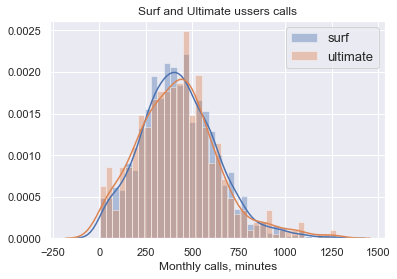

In [10]:
surf_mnts_mthly = extra_profit_df[extra_profit_df.user_packege == 'surf'].mnts_ndd_mthly_bll
ulti_mnts_mthly = extra_profit_df[extra_profit_df.user_packege == 'ultimate'].mnts_ndd_mthly_bll

surf_mnts_mthly_bll = []
ulti_mnts_mthly_bll = []

for item_time in surf_mnts_mthly:
    surf_mnts_mthly_bll.extend(item_time)
surf_mnts_mthly_bll = pd.Series([round(i, 3) for i in surf_mnts_mthly_bll if i != 0])

for item_time in ulti_mnts_mthly:
    ulti_mnts_mthly_bll.extend(item_time)
ulti_mnts_mthly_bll = pd.Series([round(i, 3) for i in ulti_mnts_mthly_bll if i != 0])

print('surf mean', round(surf_mnts_mthly_bll.mean(), 2))
print('ultimate mean', round(ulti_mnts_mthly_bll.mean(), 2))
# I just like median more then mean)
# print('surf median', round(surf_mnts_mthly_bll.median(), 2))
# print('ultimate median', round(ulti_mnts_mthly_bll.median(), 2))
print('surf standart deviation', round(surf_mnts_mthly_bll.std(), 2))
print('ultimate standart deviation', round(ulti_mnts_mthly_bll.std(), 2))

sns.distplot(surf_mnts_mthly_bll, bins=37, label='surf')
sns.distplot(ulti_mnts_mthly_bll, bins=37, label='ultimate')

plt.legend(prop={'size': 13})
plt.title('Surf and Ultimate ussers calls')
plt.xlabel('Monthly calls, minutes')


### the text the users of each plan require per month

surf mean 40.66
ultimate mean 47.46
surf standart deviation 32.2
ultimate standart deviation 32.25


Text(0.5, 0, 'Monthly messages')

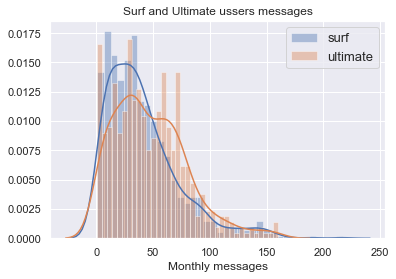

In [11]:
surf_msg_mthly = extra_profit_df[extra_profit_df.user_packege == 'surf'].msg_ndd_mthly_bll
ulti_msg_mthly = extra_profit_df[extra_profit_df.user_packege == 'ultimate'].msg_ndd_mthly_bll

surf_msg_mthly_bll = []
ulti_msg_mthly_bll = []

for item_msg in surf_msg_mthly:
    surf_msg_mthly_bll.extend(item_msg)
surf_msg_mthly_bll = pd.Series([round(i, 3) for i in surf_msg_mthly_bll if i != 0])

for item_msg in ulti_msg_mthly:
    ulti_msg_mthly_bll.extend(item_msg)
ulti_msg_mthly_bll = pd.Series([round(i, 3) for i in ulti_msg_mthly_bll if i != 0])

print('surf mean', round(surf_msg_mthly_bll.mean(), 2))
print('ultimate mean', round(ulti_msg_mthly_bll.mean(), 2))
# I just like median more then mean)
# print('surf median', round(surf_msg_mthly_bll.median(), 2))
# print('ultimate median', round(ulti_msg_mthly_bll.median(), 2))
print('surf standart deviation', round(surf_msg_mthly_bll.std(), 2))
print('ultimate standart deviation', round(ulti_msg_mthly_bll.std(), 2))
sns.distplot(surf_msg_mthly_bll, bins=37, label='surf')
sns.distplot(ulti_msg_mthly_bll, bins=37, label='ultimate')

plt.legend(prop={'size': 13})
plt.title('Surf and Ultimate ussers messages')
plt.xlabel('Monthly messages')


### the volume of data the users of each plan require per month

surf mean 17.35
ultimate mean 18.08
surf standart deviation 7.23
ultimate standart deviation 7.3


Text(0.5, 0, 'Monthly Gb')

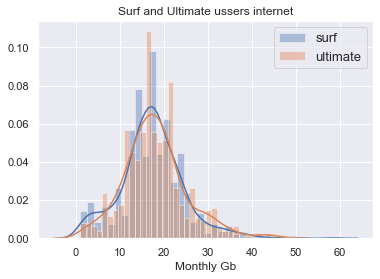

In [12]:
surf_gb_mthly = extra_profit_df[extra_profit_df.user_packege == 'surf'].gb_ndd_mthly_bll
ulti_gb_mthly = extra_profit_df[extra_profit_df.user_packege == 'ultimate'].gb_ndd_mthly_bll

surf_gb_mthly_bll = []
ulti_gb_mthly_bll = []


for item_gb in surf_gb_mthly:
    surf_gb_mthly_bll.extend(item_gb)
surf_gb_mthly_bll = pd.Series([round(i, 3) for i in surf_gb_mthly_bll if i != 0])

for item_gb in ulti_gb_mthly:
    ulti_gb_mthly_bll.extend(item_gb)
ulti_gb_mthly_bll = pd.Series([round(i, 3) for i in ulti_gb_mthly_bll if i != 0])

print('surf mean', round(surf_gb_mthly_bll.mean(), 2))
print('ultimate mean', round(ulti_gb_mthly_bll.mean(), 2))
# I just like median more then mean)
# print('surf median', round(surf_gb_mthly_bll.median(), 2))
# print('ultimate median', round(ulti_gb_mthly_bll.median(), 2))
print('surf standart deviation', round(surf_gb_mthly_bll.std(), 2))
print('ultimate standart deviation', round(ulti_gb_mthly_bll.std(), 2))

sns.distplot(surf_gb_mthly_bll, bins=37, label='surf')
sns.distplot(ulti_gb_mthly_bll, bins=37, label='ultimate')

plt.legend(prop={'size': 13})
plt.title('Surf and Ultimate ussers internet')
plt.xlabel('Monthly Gb')


> - The average profit from users in NY-NJ area is different from that of the users from other regions.

### function to compare regions profit